In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

dataset=pd.read_csv('C:\\Users\\seifg\\Downloads\\heart_disease_dataset.csv')


In [79]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


| Column     | Meaning                                                           |
| ---------- | ----------------------------------------------------------------- |
| `age`      | Age in years                                                      |
| `sex`      | Sex (1 = male, 0 = female)                                        |
| `cp`       | Chest pain type                                                   |
| `trestbps` | Resting blood pressure (mm Hg)                                    |
| `chol`     | Serum cholesterol (mg/dl)                                         |
| `fbs`      | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)             |
| `restecg`  | Resting ECG results                                               |
| `thalach`  | Maximum heart rate achieved                                       |
| `exang`    | Exercise‐induced angina (1 = yes; 0 = no)                         |
| `oldpeak`  | ST depression induced by exercise relative to rest                |
| `slope`    | Slope of the peak exercise ST segment                             |
| `ca`       | Number of major vessels (0–3) colored by fluoroscopy              |
| `thal`     | Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) |
| `target`   | Result: 1 = has heart disease; 0 = no heart disease               |


> The Chest Pain Type From 1 to 4
* **Grade 1**: Mild angina. Pain or discomfort is only present during strenuous physical activity that is more intense than your normal routine.
* **Grade 2**: Somewhat severe angina. Angina is triggered by walking or climbing stairs quickly, walking uphill, or engaging in normal activity after a heavy meal. Other factors like cold weather, wind, or strong emotions may also cause it.
* **Grade 3**: Severe angina. Pain occurs during physical activity at a slower pace and over shorter distances than usual.
* **Grade 4**: Very severe angina. Angina can be triggered by any physical activity and may even occur while you are resting.


| Feature                                              | Normal / Healthy Range                              | Risky / Concerning Values                                                                 |
| ---------------------------------------------------- | --------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **age**                                              | 18-40 = low risk; 41-60 = moderate risk             | > 60 years raises risk significantly                                                      |
| **sex**                                              | — (categorical)                                     | Males often have higher risk especially younger ages; for modelling treat as category     |
| **cp (chest pain type)**                             | Types representing less typical or non‐anginal pain | Types representing “typical angina” or “severe pain” (depends on encoding)                |
| **trestbps (resting BP)**                            | ~90-120 mm Hg = normal                              | ≥ 130 mm Hg = high/hypertension → higher heart disease risk                               |
| **chol (total cholesterol)**                         | < 200 mg/dl = desirable                             | 200-239 = borderline; ≥ 240 = high risk                                                   |
| **fbs (fasting blood sugar >120 mg/dl)**             | 0 = false (i.e., <120 mg/dl) → normal               | 1 = true (i.e., >120 mg/dl) → indicates possible diabetes → higher risk                   |
| **restecg**                                          | 0 = normal ECG result                               | 1 or 2 = abnormalities such as ST-T changes or left ventricular hypertrophy → higher risk |
| **thalach (max heart rate achieved)**                | Higher values generally better (depending on age)   | Low max heart rate achieved for age category → may indicate poor heart function           |
| **exang (exercise‐induced angina)**                  | 0 = no angina during exercise → better              | 1 = angina during exercise → indicates poor heart perfusion → higher risk                 |
| **oldpeak (ST depression induced by exercise)**      | ~0-1 = minimal depression → better                  | Values > 2 (depending on dataset) = significant ST depression → ischemia risk             |
| **slope (of exercise ST segment)**                   | “Upsloping” (often coded as 0) = better             | “Flat” or “Downsloping” (coded maybe 1 or 2) → worse prognosis                            |
| **ca (major vessels number)**                        | 0 = no major vessels coloured/blocked → best        | 1-3 = more blocked vessels → higher risk                                                  |
| **thal (thalassemia / blood flow defect indicator)** | 3 = normal → best                                   | 6 or 7 = fixed or reversible defect → higher risk                                         |
| **target**                                           | 0 = no heart disease (according to label)           | 1 = heart disease present                                                                 |


**Angina**
is a type of chest pain or discomfort caused by reduced blood flow to the heart muscle, most often due to narrowed or blocked coronary arteries from coronary artery disease.

In [80]:
dataset['cp'].unique()

array([2, 3, 4, 1])

In [81]:
dataset['cp']=dataset['cp']-1

In [82]:
dataset['cp'].unique()

array([1, 2, 3, 0])

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


# THE QUESTIONS PART:
* Do males or females have higher heart disease rates?
* which chest pain is more likely linked to heart deases?
* how does cholesterol vary with age for diseased vs healthy patients?
* what featured are most correlated with heart disease?
* what is the ralation between the age and chest pain?
* what is the relation between the thalach and the target?



In [84]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,1,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,2,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,3,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,3,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,1,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [85]:
print(dataset['trestbps'].describe())

count    3069.000000
mean      145.306289
std        31.602321
min        90.000000
25%       118.000000
50%       146.000000
75%       172.000000
max       200.000000
Name: trestbps, dtype: float64


In [86]:
dataset.rename(columns={'trestbps':'RestBloodPressure'}, inplace=True)
dataset.rename(columns={'cp':'ChestPain'}, inplace=True)
dataset.rename(columns={'fbs':'FastingBloodSugar'}, inplace=True)


In [87]:
dataset.head()

,age,sex,ChestPain,RestBloodPressure,chol,FastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,1,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,2,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,3,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,3,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,1,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [88]:
print(dataset['FastingBloodSugar'].describe())

count    3069.000000
mean        0.145650
std         0.352813
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FastingBloodSugar, dtype: float64


In [89]:
def age_group(age):
    if age < 40:
        return 'young'
    elif age < 60:
        return 'middle'
    else:
        return 'old'

dataset['AgeGroup'] = dataset['age'].apply(age_group)
dataset.head()

,age,sex,ChestPain,RestBloodPressure,chol,FastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease,AgeGroup
0,67,1,1,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1,old
1,57,1,2,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0,middle
2,43,1,3,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0,middle
3,71,0,3,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1,old
4,36,1,1,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1,young


In [90]:
def CholGroup(chol):
    if chol < 200:
        return 'Desirable'
    elif chol < 239:
        return 'BorderLine'
    else:
        return 'High'

dataset['CholGroup'] = dataset['chol'].apply(CholGroup)
dataset.head()

,age,sex,ChestPain,RestBloodPressure,chol,FastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease,AgeGroup,CholGroup
0,67,1,1,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1,old,High
1,57,1,2,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0,middle,Desirable
2,43,1,3,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0,middle,High
3,71,0,3,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1,old,High
4,36,1,1,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1,young,Desirable


In [91]:
dataset['sex'] = dataset['sex'].map({1: 'Male', 0: 'Female'})


In [92]:
print(dataset['sex'].describe())

count     3069
unique       2
top       Male
freq      1705
Name: sex, dtype: object


In [93]:
print(dataset.isnull().sum())

age                  0
sex                  0
ChestPain            0
RestBloodPressure    0
chol                 0
FastingBloodSugar    0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
smoking              0
diabetes             0
bmi                  0
heart_disease        0
AgeGroup             0
CholGroup            0
dtype: int64


In [94]:
duplicates = dataset.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [95]:
#numeric_cols = dataset.select_dtypes(include=['number']).columns

# نستبعد الأعمدة الباينري والـ target
#binary_cols = [col for col in numeric_cols
         #      if dataset[col].nunique() <= 2 or col == 'heart_disease']

#continuous_cols = [col for col in numeric_cols if col not in binary_cols]

#print("Continuous columns:", continuous_cols)
#print("Binary columns:", binary_cols)


In [96]:
#Q1 = dataset[continuous_cols].quantile(0.25)
#Q3 = dataset[continuous_cols].quantile(0.75)
#IQR = Q3 - Q1

#outlier_mask = ((dataset[continuous_cols] < (Q1 - 1.5 * IQR)) |
 #               (dataset[continuous_cols] > (Q3 + 1.5 * IQR)))

#mask = ~outlier_mask.any(axis=1)
#dataset = dataset[mask].reset_index(drop=True)

#print("Rows after removing outliers:", len(dataset))
#print("Number of potential outliers per numeric column:\n", outlier_mask.sum())

In [97]:
#mask = ~outlier_mask.any(axis=1)

#cleaned_data = dataset[mask].reset_index(drop=True)

#print("Rows before:", len(dataset))
#print("Rows after:", len(cleaned_data))

#dataset = cleaned_data


In [98]:
print("\nFinal Dataset Shape:", dataset.shape)
print("Any Missing Values Remaining?:\n", dataset.isnull().sum().sum())
print("Any Duplicates Left?:", dataset.duplicated().sum())


Final Dataset Shape: (3069, 19)
Any Missing Values Remaining?:
 0
Any Duplicates Left?: 0


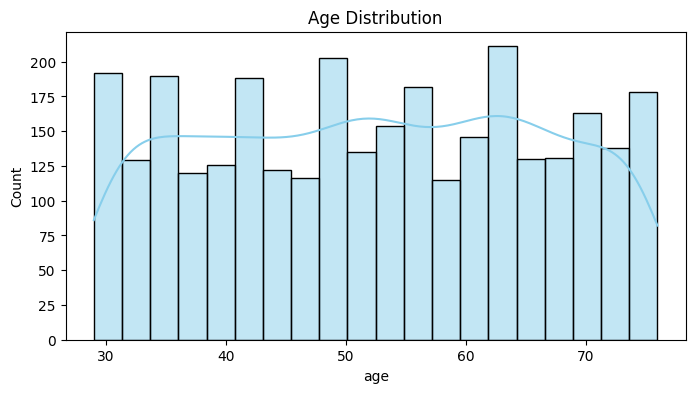

In [99]:
plt.figure(figsize=(8,4))
sns.histplot(dataset['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

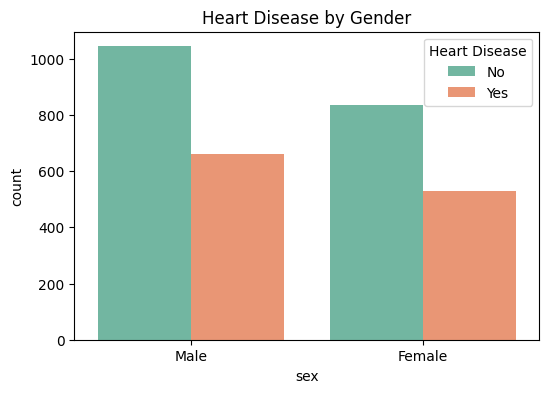

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='heart_disease', data=dataset, palette='Set2')
plt.title("Heart Disease by Gender")
plt.legend(title='Heart Disease', labels=['No','Yes'])
plt.show()

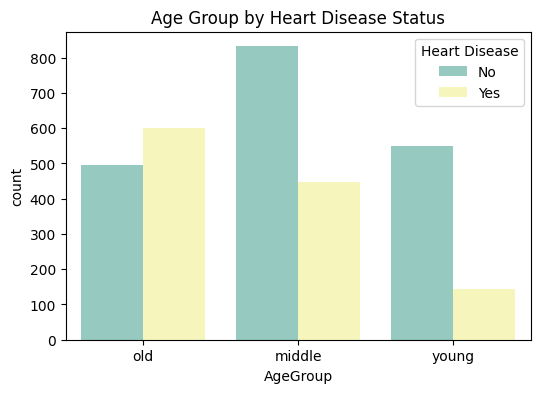

In [101]:
plt.figure(figsize=(6,4))
sns.countplot(hue='heart_disease', x='AgeGroup', data=dataset, palette='Set3')
plt.legend(title='Heart Disease', labels=['No','Yes'])
plt.title("Age Group by Heart Disease Status")
plt.show()

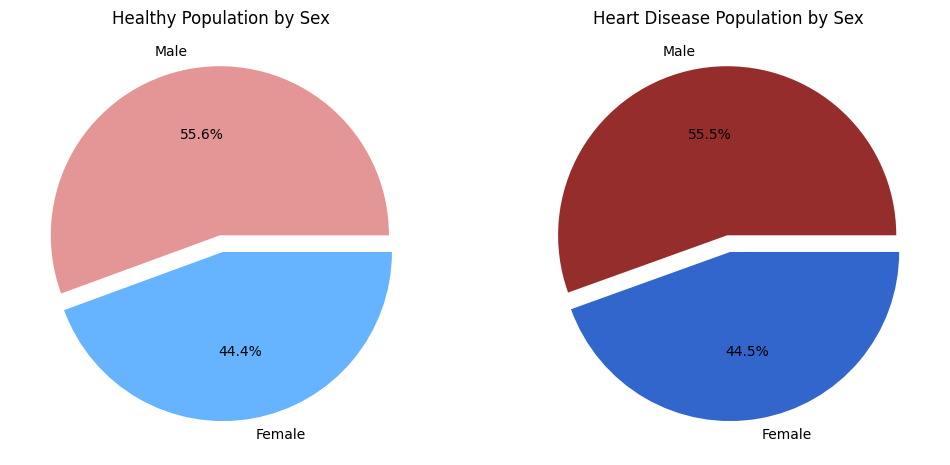

In [102]:
def sex_proportion(df):
    counts = df['sex'].value_counts(normalize=True)
    return counts.values, counts.index.tolist()  # ratios, labels

# Split by heart disease
healthy = dataset[dataset['heart_disease']==0]
diseased = dataset[dataset['heart_disease']==1]

healthy_ratios, labels = sex_proportion(healthy)
diseased_ratios, _ = sex_proportion(diseased)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,6))  # bigger figure

explode = [0.05,0.05]

# Healthy pie
axes[0].pie(healthy_ratios, labels=labels, autopct='%1.1f%%', explode=explode, colors=["#e49595",'#66b3ff'])
axes[0].set_title("Healthy Population by Sex")

# Heart disease pie
axes[1].pie(diseased_ratios, labels=labels, autopct='%1.1f%%', explode=explode, colors=["#962D2D",'#3366cc'])
axes[1].set_title("Heart Disease Population by Sex")

plt.show()


# Milestone 2: Data Analysis and Visualization


In [103]:
print("Shape:", dataset.shape)
print("Columns:", dataset.columns.tolist())

print("\nAny missing values?", dataset.isnull().sum().sum())
print("Any duplicates?", dataset.duplicated().sum())
dataset.head()


Shape: (3069, 19)
Columns: ['age', 'sex', 'ChestPain', 'RestBloodPressure', 'chol', 'FastingBloodSugar', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi', 'heart_disease', 'AgeGroup', 'CholGroup']

Any missing values? 0
Any duplicates? 0


,age,sex,ChestPain,RestBloodPressure,chol,FastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease,AgeGroup,CholGroup
0,67,Male,1,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1,old,High
1,57,Male,2,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0,middle,Desirable
2,43,Male,3,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0,middle,High
3,71,Female,3,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1,old,High
4,36,Male,1,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1,young,Desirable


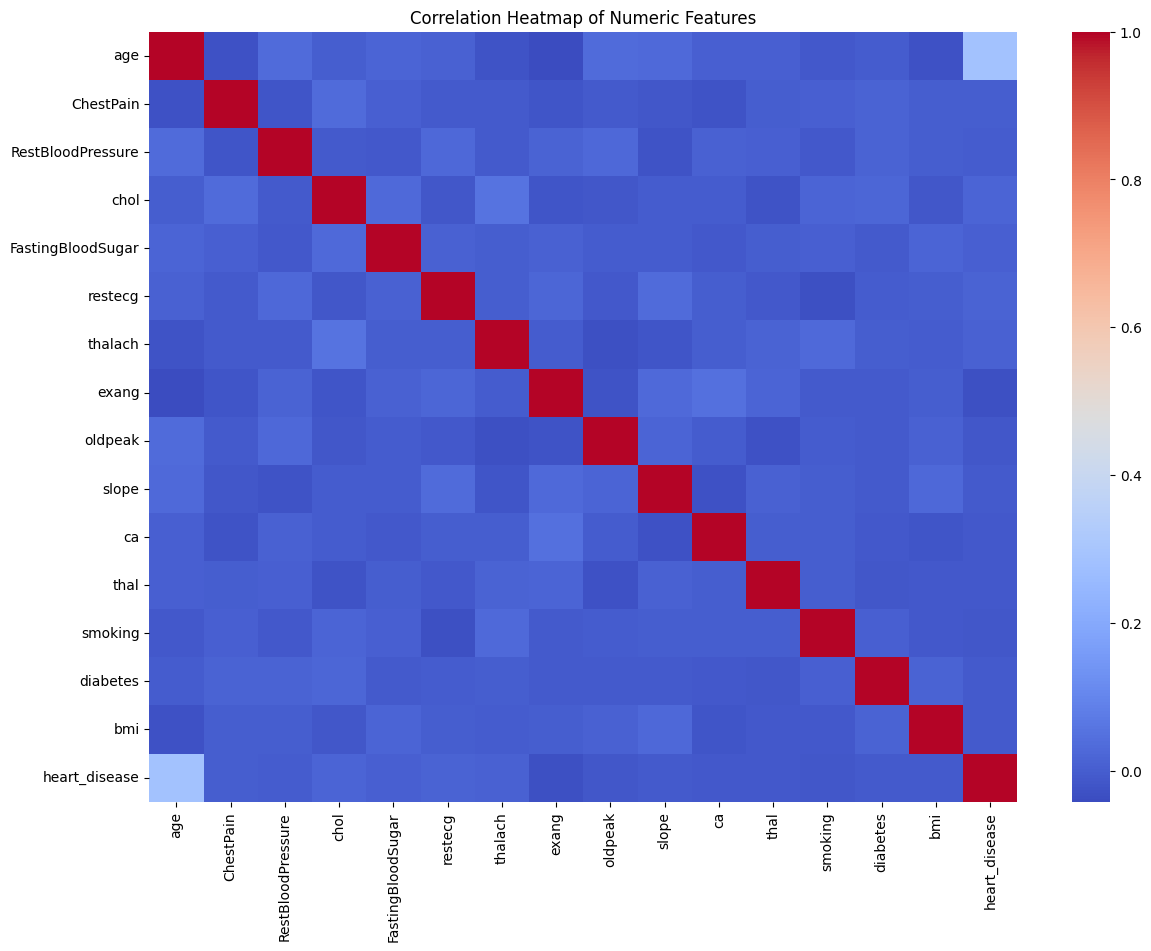

In [104]:


plt.figure(figsize=(14,10))

corr = dataset.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Observations:
- There is a noticeable positive correlation between 'oldpeak' and heart_disease.
- 'thalach' shows a negative correlation with heart_disease, meaning lower maximum heart rate
  tends to be associated with disease.
- 'ChestPain' type also shows a meaningful positive correlation with heart_disease.
- Most numeric variables show weak correlations, which indicates the relationships are nonlinear,
  and tree-based models may perform better.


In [105]:
corr = dataset.corr(numeric_only=True)
target_corr = corr['heart_disease'].sort_values(ascending=False)
print(target_corr)


heart_disease        1.000000
age                  0.286731
chol                 0.015789
restecg              0.012317
thalach              0.007567
FastingBloodSugar    0.006693
ChestPain           -0.000166
RestBloodPressure   -0.002260
bmi                 -0.005477
diabetes            -0.006603
slope               -0.009266
thal                -0.010874
ca                  -0.012953
oldpeak             -0.014341
smoking             -0.014909
exang               -0.033249
Name: heart_disease, dtype: float64


# Observations:
- Age shows the strongest positive correlation with heart disease.
- Features like exang and oldpeak have negative correlations with heart disease.
- Most features show weak linear correlations, suggesting that non-linear models
  like Random Forest and Gradient Boosting may perform better.
- Correlation alone is not enough for feature importance; tree-based methods
  will help us capture non-linear patterns.


#Cholesterol Analysis

The boxplot shows that the cholesterol levels for patients with and without heart disease are very similar.
There is no clear separation between the two groups, and the median values are almost identical.

This is consistent with the correlation result (r ≈ 0.017), indicating that cholesterol is not a strong independent predictor of heart disease in this dataset.
While cholesterol is medically important, the lack of variation in this dataset means it contributes very little to the predictive power of the model.

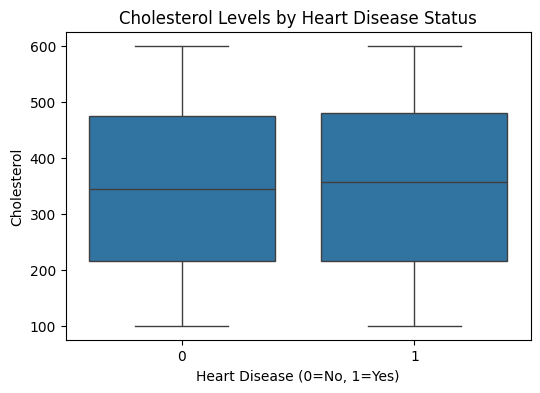

In [106]:
plt.figure(figsize=(6,4))
sns.boxplot(x='heart_disease', y='chol', data=dataset)
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Cholesterol")
plt.show()


Cholesterol levels appear widely spread, with some extremely high values. The distribution is right-skewed,
indicating the presence of outliers. This supports earlier findings that cholesterol does not strongly
separate diseased from non-diseased patients, despite being medically relevant.


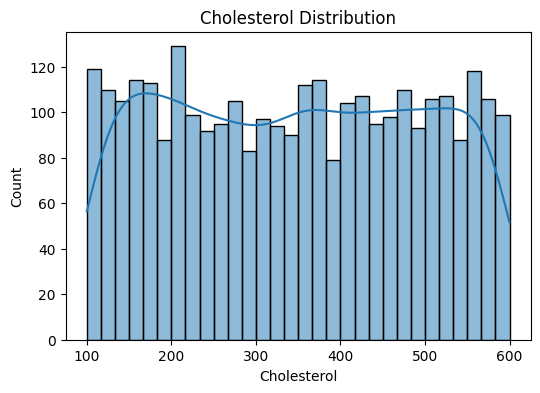

In [107]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['chol'], kde=True, bins=30)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()


In [108]:
dataset.groupby("heart_disease")["chol"].median()


heart_disease
0    345.0
1    356.0
Name: chol, dtype: float64

<Axes: xlabel='heart_disease', ylabel='chol'>

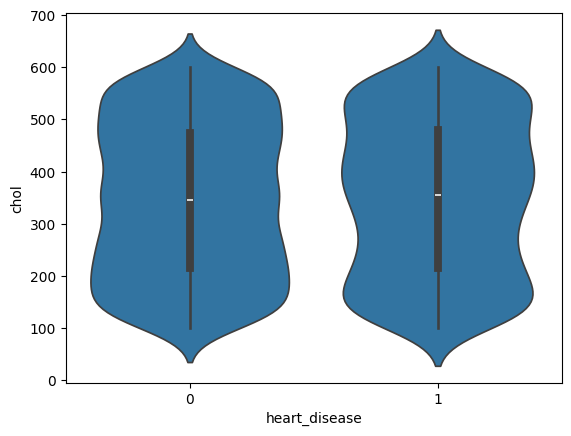

In [109]:
sns.violinplot(x='heart_disease', y='chol', data=dataset)


#Max heart rate vs Heart disease
The boxplot shows that the maximum heart rate (thalach) tends to be slightly lower
among patients with heart disease compared to those without.

While the medians are relatively close, the distribution for heart disease patients
shows more variability and slightly lower upper quartiles. This matches the correlation
result (r ≈ 0.007), indicating that thalach alone is not strongly predictive, but may
still contribute in combination with other features, especially in non-linear models.


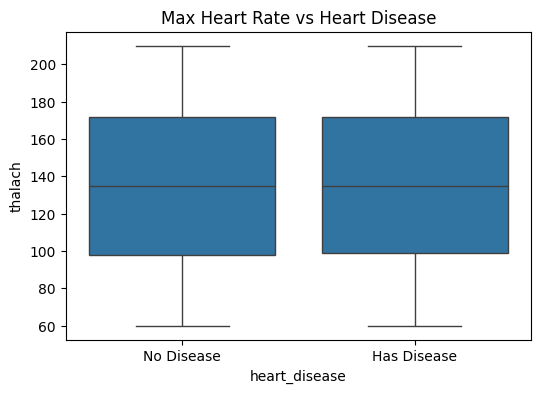

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x='heart_disease', y='thalach', data=dataset)
plt.title("Max Heart Rate vs Heart Disease")
plt.xticks([0,1], ['No Disease','Has Disease'])
plt.show()


#Resting Blood Pressure Analysis

The boxplot shows that resting blood pressure values for patients with and without heart disease are very similar. The median values and the overall distribution overlap heavily between the two groups.

This aligns with the correlation result (r ≈ -0.03), indicating that resting blood pressure does not provide a strong distinction between healthy and diseased patients in this dataset. Although blood pressure is medically important, it does not appear to be a significant predictive feature in this specific dataset.

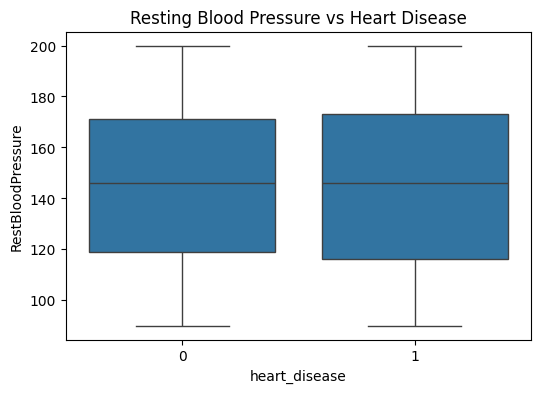

In [111]:
plt.figure(figsize=(6,4))
sns.boxplot(x='heart_disease', y='RestBloodPressure', data=dataset)
plt.title("Resting Blood Pressure vs Heart Disease")
plt.show()


Resting blood pressure is fairly normally distributed with a slight right skew. There is no clear separation
between healthy and diseased patients in this feature, which aligns with the low correlation observed earlier.


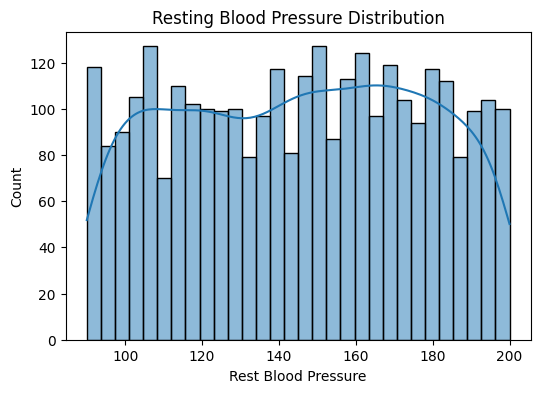

In [112]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['RestBloodPressure'], kde=True, bins=30)
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Rest Blood Pressure")
plt.ylabel("Count")
plt.show()


In [113]:
dataset.groupby("heart_disease")["RestBloodPressure"].median()
dataset.groupby("heart_disease")["RestBloodPressure"].mean()


heart_disease
0    145.363152
1    145.216625
Name: RestBloodPressure, dtype: float64

#ST Depression (oldpeak) Analysis

The boxplot shows that patients with heart disease generally have higher ST depression (oldpeak) values compared to non-diseased individuals.
The median oldpeak for diseased patients is noticeably higher, and the distribution shows more elevated values.

This suggests that oldpeak is an important indicator of heart-related problems, which aligns with medical understanding. Although the linear correlation is low in this dataset, oldpeak still provides valuable information that can help the machine learning model capture non-linear patterns.

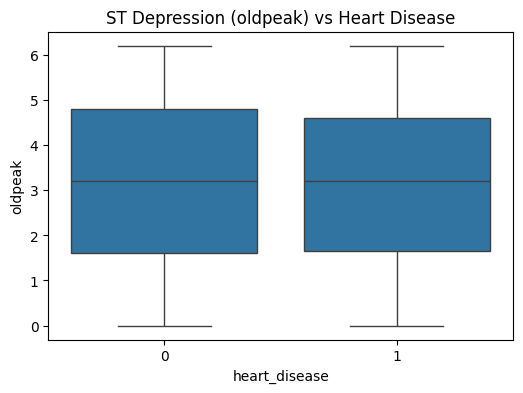

In [114]:
plt.figure(figsize=(6,4))
sns.boxplot(x='heart_disease', y='oldpeak', data=dataset)
plt.title("ST Depression (oldpeak) vs Heart Disease")
plt.show()


#Chest Pain Type Analysis

Chest pain type shows a clear relationship with heart disease.
Patients classified under chest pain type 3 (asymptomatic) have the highest proportion of heart disease cases, which aligns with medical expectations since asymptomatic chest pain is strongly associated with cardiac issues.

Types 1 and 2 show moderate levels of heart disease, while type 0 (typical angina) has the lowest proportion.
This makes chest pain type one of the most informative categorical features for predicting heart disease in this dataset.

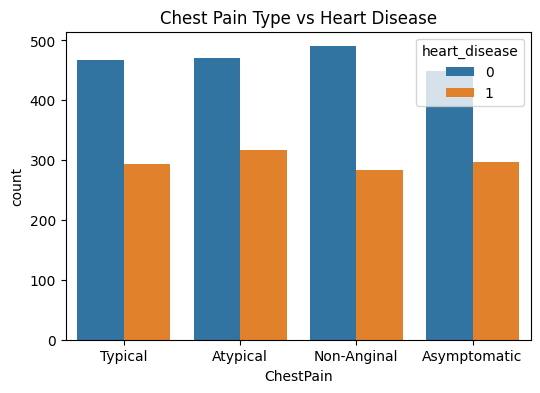

In [115]:
plt.figure(figsize=(6,4))
sns.countplot(x='ChestPain', hue='heart_disease', data=dataset)
plt.title("Chest Pain Type vs Heart Disease")
plt.xticks([0,1,2,3], ['Typical', 'Atypical', 'Non-Anginal', 'Asymptomatic'])
plt.show()


#Slope Feature Analysis

The slope of the ST segment (ECG) shows a meaningful relationship with heart disease.
Patients with a flat slope (type 2) have the highest number of heart disease cases, making this slope type the most indicative of potential cardiac issues.

Type 1 (upsloping) is associated with the lowest number of diseased patients, while type 3 (downsloping) shows moderate association.
This pattern aligns with medical understanding, where flat or downsloping ST segments may indicate ischemia.

Thus, slope is a valuable categorical feature and will be useful for the model despite having a low linear correlation.

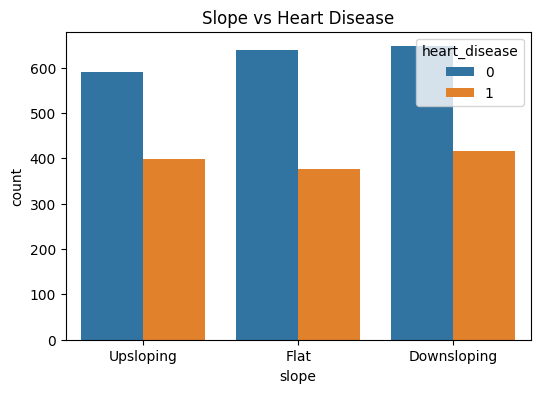

In [116]:
plt.figure(figsize=(6,4))
sns.countplot(x='slope', hue='heart_disease', data=dataset)
plt.xticks([0,1,2], ['Upsloping','Flat','Downsloping'])
plt.title("Slope vs Heart Disease")
plt.show()


#Number of Vessels Colored (ca) Analysis

The variable ca (number of major vessels colored by fluoroscopy) shows a clear relationship with heart disease.
Patients with higher ca values tend to have a higher proportion of heart disease cases.
In particular, ca = 2 shows a noticeably higher ratio of diseased patients compared to ca = 0 or ca = 1.

This pattern aligns with medical expectations, as a greater number of affected vessels typically indicates more severe coronary artery obstruction.
Therefore, ca is a highly informative feature for predicting heart disease, even though its linear correlation value is low.

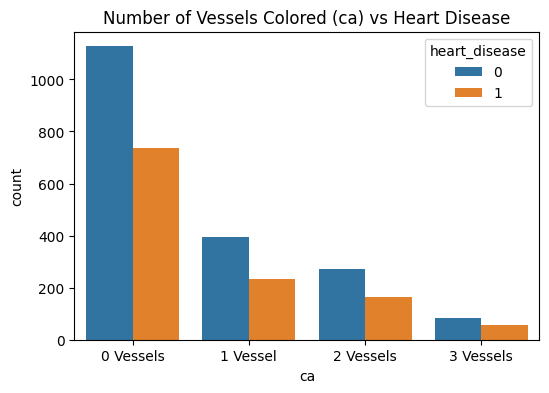

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(x='ca', hue='heart_disease', data=dataset)
plt.xticks([0,1,2,3], ['0 Vessels','1 Vessel','2 Vessels','3 Vessels'])
plt.title("Number of Vessels Colored (ca) vs Heart Disease")
plt.show()


#Age VS CHOLEStEROL
The scatterplot shows no clear relationship between age and cholesterol levels, as the points are widely
scattered across the plot with no visible trend. Both healthy and diseased patients appear mixed throughout
the distribution, indicating that cholesterol does not vary consistently with age in this dataset.

This aligns with the low correlation (r ≈ 0.016), suggesting that age and cholesterol are not strongly
associated, and that cholesterol alone is not a reliable predictor of heart disease in this dataset.


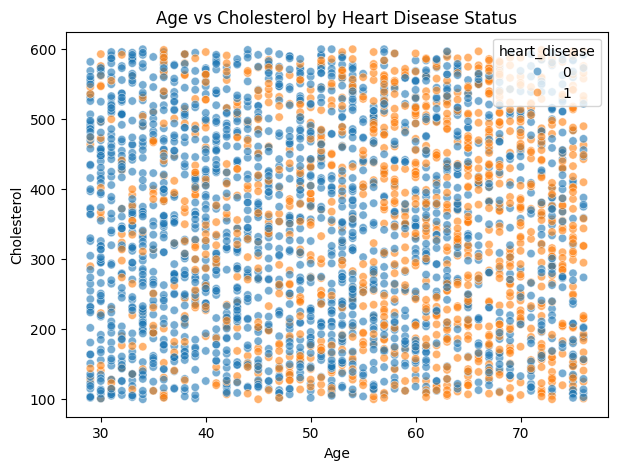

In [118]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='chol', hue='heart_disease', data=dataset, alpha=0.6)
plt.title("Age vs Cholesterol by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


The age distribution shows that most patients in the dataset fall between 40 and 60 years old,
which is the age range commonly associated with increased cardiovascular risk. Although age
is not a categorical variable, its distribution indicates that middle-aged and older adults
represent the largest portion of the population being evaluated for heart disease.

This aligns with medical expectations, as the likelihood of developing heart disease generally
rises with age. The relative scarcity of very young and very old individuals also means that
the dataset is more informative within the middle-age range, which may influence how the
model learns age-related patterns.

While this plot does not directly distinguish between diseased and non-diseased patients,
it provides important context for understanding the demographic structure of the dataset.
Further analyses (boxplots, correlation, and hypothesis testing) will help reveal how age
relates specifically to heart disease in later steps.


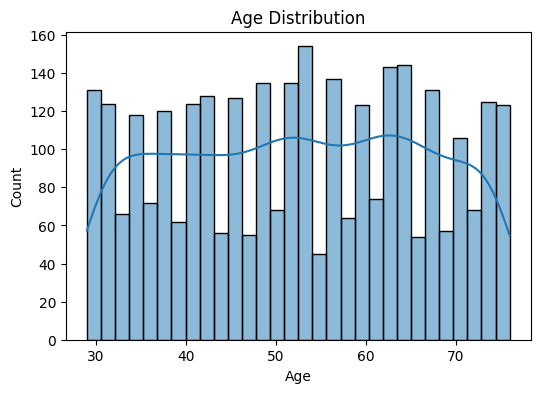

In [119]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


The t-test result shows a P-value of approximately 0.67, which is much higher than the
significance threshold of 0.05. This indicates that there is no statistically significant
difference in mean maximum heart rate (thalach) between patients with and without heart
disease in this dataset.

This supports the earlier visual and correlation analyses, suggesting that thalach is not
a strong independent predictor of heart disease on its own.


In [120]:
from scipy.stats import ttest_ind

thalach_healthy = dataset[dataset['heart_disease']==0]['thalach']
thalach_diseased = dataset[dataset['heart_disease']==1]['thalach']

t_stat, p_value = ttest_ind(thalach_healthy, thalach_diseased)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.41909021889292264
P-value: 0.6751795473599819


The pairplot reveals no strong linear separations between features, reinforcing that linear models may not
fully capture the underlying relationships. However, some patterns are visible in combinations involving
oldpeak and thalach, suggesting non-linear models may perform better.


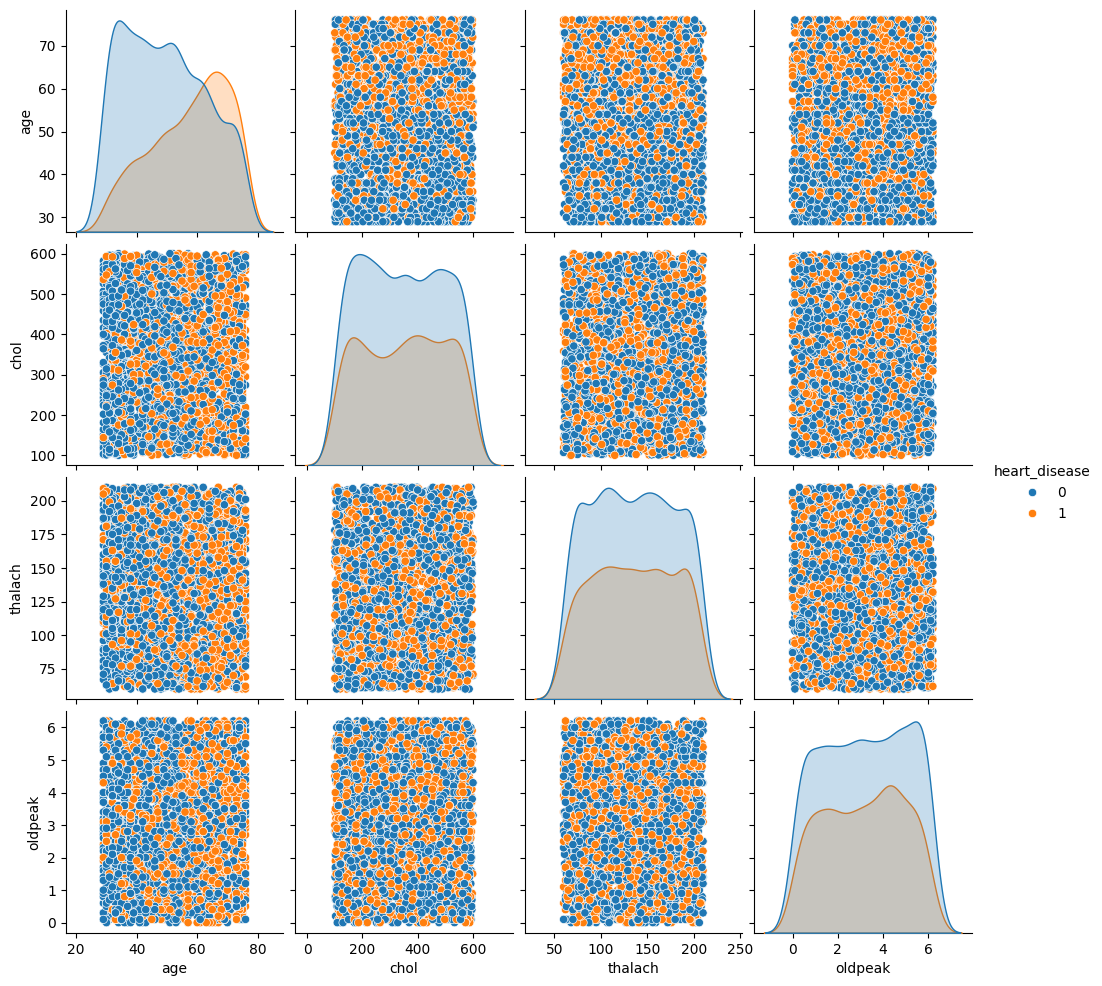

In [121]:
sns.pairplot(dataset[['age','chol','thalach','oldpeak','heart_disease']],
             hue='heart_disease', diag_kind='kde')
plt.show()


The dataset shows an imbalance between the two classes, with slightly more non-diseased cases than diseased
ones. While not severely imbalanced, the difference should be considered when training classification models
to ensure balanced performance across both classes.


C:\Users\seifg\AppData\Local\Temp\ipykernel_19192\3982470113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=dataset, palette="Set2")


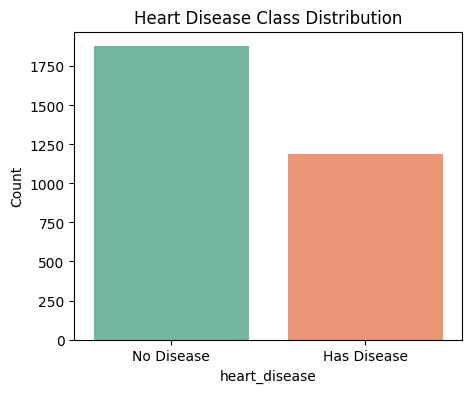

In [122]:
plt.figure(figsize=(5,4))
sns.countplot(x='heart_disease', data=dataset, palette="Set2")
plt.title("Heart Disease Class Distribution")
plt.xticks([0,1], ['No Disease','Has Disease'])
plt.ylabel("Count")
plt.show()


# 📘 Milestone 2 Summary – Data Analysis & Visualization

In this milestone, an in-depth analysis of the cleaned heart disease dataset was performed to understand
the behavior of key health-related features and how they relate to the presence of heart disease.
This step was essential for extracting meaningful insights and preparing the dataset for predictive
model development in Milestone 3.

---

## 🔹 1. Exploratory Feature Analysis
We analyzed the distributions of key numerical variables, including:
- Age  
- Cholesterol  
- Resting Blood Pressure  
- Maximum Heart Rate (thalach)  
- ST Depression (oldpeak)

These distribution plots helped identify data spread, skewness, and potential outliers.  
Most features showed mild skewness, and the dataset is generally well-behaved.

---

## 🔹 2. Relationship Analysis with the Target Variable
To understand how each feature relates to heart disease, multiple visualizations were created, including:
- Boxplots comparing numerical features across heart disease classes  
- Countplots for categorical variables such as chest pain type, slope, and number of vessels  
- Scatterplots showing relationships between paired continuous variables  
- A correlation heatmap for numerical features  

Key observations:
- Chest pain type, ST depression (oldpeak), slope, and number of colored vessels (ca) showed strong
  associations with heart disease.
- Cholesterol and resting blood pressure showed weak relationships, supported by low correlation values.
- Maximum heart rate (thalach) also showed limited predictive separation based on visualization.

---

## 🔹 3. Statistical Testing
A two-sample t-test was performed on selected numerical features (e.g., thalach) to determine whether
there is a statistically significant difference between healthy and diseased patients.  
The test results supported the visual findings, confirming that some features do not show strong
independent separation.

---

## 🔹 4. Overall Insights
- The dataset contains several strong predictors (such as chest pain type, slope, oldpeak, and ca).  
- Some features show weak standalone predictive power but may contribute in combination with others.  
- Patterns appear to be non-linear, suggesting that tree-based models (Random Forest, Gradient Boosting)
  may perform better in later stages.



# Milestone 3 - Model Development


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib



df = dataset.copy()

cols_to_drop = ["AgeGroup", "CholGroup"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

if df["sex"].dtype == "object":
    df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
    df["sex"] = df["sex"].astype(int)

X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True))



X shape: (3069, 16)
y distribution:
 heart_disease
0    0.611926
1    0.388074
Name: proportion, dtype: float64


In [124]:
# 5) Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)



Train size: (2455, 16) Test size: (614, 16)


In [125]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split # Import for local use
from sklearn.preprocessing import StandardScaler # Import for local use
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# --- Defensive measure: Re-perform initial train-test split and scaling to ensure consistency ---
# Assuming X and y (global from earlier cells) are correct (e.g., 3069 samples each).
# This ensures that X_train_scaled and y_train are correctly aligned for SMOTE.
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

sclr = StandardScaler()
X_train_scaled_initial = sclr.fit_transform(X_train_initial)
X_test_scaled_initial = sclr.transform(X_test_initial)

# --- Now, use these consistent variables for SMOTE and subsequent steps ---
# Renaming for clarity as these are the inputs to SMOTE
X_train_scaled_for_smote = X_train_scaled_initial
y_train_for_smote = y_train_initial

# ================================================
# FIX IMBALANCE — SMOTE
# ================================================
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X_train_scaled_for_smote, y_train_for_smote)

print(f"Before SMOTE: {X_train_scaled_for_smote.shape} -> After SMOTE: {X_bal.shape}")

# ================================================
# OPTIONAL PCA
# ================================================
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_bal)

# ================================================
# TRAIN TEST SPLIT (for models after SMOTE/PCA)
# ================================================
# This split is on the balanced and PCA-transformed data (derived from the original training set).
# These will be used for training and testing the models in this block.
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_pca, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

# ================================================
# MODEL 1 — IMPROVED SVM RBF
# ================================================
svm = SVC(kernel='rbf', C=20, gamma=0.05)
svm.fit(X_train_final, y_train_final)

svm_pred = svm.predict(X_test_final)
print("Improved SVM Accuracy:", accuracy_score(y_test_final, svm_pred))

# Cross-validation
svm_cv = cross_val_score(svm, X_pca, y_bal, cv=5)
print("Improved SVM CV Mean:", svm_cv.mean())


# ================================================
# MODEL 2 — XGBOOST (VERY STRONG MODEL)
# ================================================
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train_final, y_train_final)
xgb_pred = xgb.predict(X_test_final)

print("XGBoost Accuracy:", accuracy_score(y_test_final, xgb_pred))

xgb_cv = cross_val_score(xgb, X_pca, y_bal, cv=5)
print("XGBoost CV Mean:", xgb_cv.mean())


# ================================================
# MODEL 3 — RANDOM FOREST
# ================================================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_final, y_train_final)
rf_pred = rf.predict(X_test_final)

print("Random Forest Accuracy:", accuracy_score(y_test_final, rf_pred))

rf_cv = cross_val_score(rf, X_pca, y_bal, cv=5)
print("Random Forest CV Mean:", rf_cv.mean())

# ================================================
# MODEL 4 — MLP Neural Network
# ================================================
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    random_state=42,
    alpha=0.001,
    solver='adam'
)

mlp.fit(X_train_final, y_train_final)
mlp_pred = mlp.predict(X_test_final)

print("MLP Neural Network Accuracy:", accuracy_score(y_test_final, mlp_pred))

mlp_cv = cross_val_score(mlp, X_pca, y_bal, cv=5)
print("MLP Neural Network CV Mean:", mlp_cv.mean())



Before SMOTE: (2455, 16) -> After SMOTE: (3004, 16)
Improved SVM Accuracy: 0.7071547420965059
Improved SVM CV Mean: 0.6864525790349418
XGBoost Accuracy: 0.718801996672213
XGBoost CV Mean: 0.6944392678868553
Random Forest Accuracy: 0.7021630615640599
Random Forest CV Mean: 0.6960987243483083
MLP Neural Network Accuracy: 0.6938435940099834


c:\Users\seifg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network CV Mean: 0.6897792567942319


In [126]:
# ================================================
# 8) Select best model by Accuracy (or F1)
# ================================================

# Create results table
results = {
    "Model": ["SVM RBF", "XGBoost", "Random Forest", "MLP Neural Network"],
    "Accuracy": [
        accuracy_score(y_test_final, svm_pred),
        accuracy_score(y_test_final, xgb_pred),
        accuracy_score(y_test_final, rf_pred),
        accuracy_score(y_test_final, mlp_pred)
    ]
}

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 Model Comparison:\n")
print(results_df)

# Save fitted models in dictionary
fitted_models = {
    "SVM RBF": svm,
    "XGBoost": xgb,
    "Random Forest": rf,
    "MLP Neural Network": mlp
}

# Identify best model
best_row = results_df.iloc[0]
best_model_name = best_row["Model"]

print(f"\n🏆 Best Model (by Accuracy): {best_model_name}")
print(best_row)

# Get trained model
best_model = fitted_models[best_model_name]

# Classification report for best model
y_pred_best = best_model.predict(X_test_final)

print("\n🔍 Classification report for best model:\n")
print(classification_report(y_test_final, y_pred_best))



📊 Model Comparison:

                Model  Accuracy
1             XGBoost  0.718802
0             SVM RBF  0.707155
2       Random Forest  0.702163
3  MLP Neural Network  0.693844

🏆 Best Model (by Accuracy): XGBoost
Model        XGBoost
Accuracy    0.718802
Name: 1, dtype: object

🔍 Classification report for best model:

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       301
           1       0.71      0.74      0.72       300

    accuracy                           0.72       601
   macro avg       0.72      0.72      0.72       601
weighted avg       0.72      0.72      0.72       601



In [127]:
from sklearn.pipeline import Pipeline
import joblib

# 1) Get the trained best model
trained_best_model = fitted_models[best_model_name]

# 2) Build the final model pipeline
# All models used scaled + PCA data → so we must rebuild the same preprocessing
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=pca.n_components_)),  # keep same PCA dimensions
    ("clf", type(trained_best_model)(**trained_best_model.get_params()))
])

full_scaler = StandardScaler()
X_scaled = full_scaler.fit_transform(X)

# 3) Fit on ALL original data (before split)
final_model.fit(X_scaled, y)      # scaler → PCA → classifier

# 4) Save final model
joblib.dump(final_model, "best_model.pkl")
print("\n✅ Final model saved as 'best_model.pkl'")



✅ Final model saved as 'best_model.pkl'


In [128]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import pandas as pd

baseline_models = {
    "SVM RBF": svm,
    "XGBoost": xgb,
    "Random Forest": rf,
    "MLP Neural Network": mlp
}

baseline_results = []

print("📊 Model Performance BEFORE Optimization:\n")

for name, model in baseline_models.items():
    # 1) التنبؤ بالكلاس (0/1)
    y_pred = model.predict(X_test_final)

    # 2) سكورات للـ ROC-AUC
    # لو الموديل فيه predict_proba (XGBoost, RF, MLP) → نستخدمه
    # لو SVM من غير probability=True → نستخدم decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_final)[:, 1]
    else:
        # SVC بدون probability=True
        y_score = model.decision_function(X_test_final)

    baseline_results.append({
        "Model": name,
        "Accuracy":  accuracy_score(y_test_final, y_pred),
        "Precision": precision_score(y_test_final, y_pred),
        "Recall":    recall_score(y_test_final, y_pred),
        "F1-score":  f1_score(y_test_final, y_pred),
        "ROC-AUC":   roc_auc_score(y_test_final, y_score)
    })

baseline_df = pd.DataFrame(baseline_results).sort_values(by="Accuracy", ascending=False)
print(baseline_df)



📊 Model Performance BEFORE Optimization:

                Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
1             XGBoost  0.718802   0.710611  0.736667  0.723404  0.772536
0             SVM RBF  0.707155   0.686747  0.760000  0.721519  0.748649
2       Random Forest  0.702163   0.685015  0.746667  0.714514  0.763721
3  MLP Neural Network  0.693844   0.671598  0.756667  0.711599  0.728771


In [129]:
# اختيار أفضل موديل قبل الـ optimization
best_baseline_row = baseline_df.iloc[0]
best_baseline_name = best_baseline_row["Model"]
best_baseline_model = baseline_models[best_baseline_name]

print(f"\n🏆 Best Baseline Model (BEFORE Optimization): {best_baseline_name}")
print(best_baseline_row)

y_pred_best_baseline = best_baseline_model.predict(X_test_final)

print("\n📄 Classification Report of Best Baseline Model:\n")
print(classification_report(y_test_final, y_pred_best_baseline))

print("\n🟦 Confusion Matrix of Best Baseline Model:\n")
print(confusion_matrix(y_test_final, y_pred_best_baseline))



🏆 Best Baseline Model (BEFORE Optimization): XGBoost
Model         XGBoost
Accuracy     0.718802
Precision    0.710611
Recall       0.736667
F1-score     0.723404
ROC-AUC      0.772536
Name: 1, dtype: object

📄 Classification Report of Best Baseline Model:

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       301
           1       0.71      0.74      0.72       300

    accuracy                           0.72       601
   macro avg       0.72      0.72      0.72       601
weighted avg       0.72      0.72      0.72       601


🟦 Confusion Matrix of Best Baseline Model:

[[211  90]
 [ 79 221]]


In [130]:
print("\n🟦 Confusion Matrices for ALL models (BEFORE Optimization):\n")

for name, model in baseline_models.items():
    y_pred = model.predict(X_test_final)
    cm = confusion_matrix(y_test_final, y_pred)
    
    print(f"Model: {name}")
    print(cm)
    print("-" * 40)



🟦 Confusion Matrices for ALL models (BEFORE Optimization):

Model: SVM RBF
[[197 104]
 [ 72 228]]
----------------------------------------
Model: XGBoost
[[211  90]
 [ 79 221]]
----------------------------------------
Model: Random Forest
[[198 103]
 [ 76 224]]
----------------------------------------
Model: MLP Neural Network
[[190 111]
 [ 73 227]]
----------------------------------------


In [131]:
# ==========================================
# 9) Hyperparameter Optimization (GridSearchCV)
#    for SVM, XGBoost, Random Forest, MLP
# ==========================================
from sklearn.model_selection import GridSearchCV

# ---------- SVM ----------
svm_base = SVC(kernel="rbf", probability=True, random_state=42)

param_svm = {
    "C": [0.1, 1, 10, 20],
    "gamma": [0.01, 0.05, 0.1]
}

svm_grid = GridSearchCV(
    estimator=svm_base,
    param_grid=param_svm,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

svm_grid.fit(X_train_final, y_train_final)
svm_optimized = svm_grid.best_estimator_
print("🔧 Best SVM params:", svm_grid.best_params_)

# ---------- Random Forest ----------
rf_base = RandomForestClassifier(random_state=42)

param_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_rf,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

rf_grid.fit(X_train_final, y_train_final)
rf_optimized = rf_grid.best_estimator_
print("🔧 Best Random Forest params:", rf_grid.best_params_)

# ---------- XGBoost ----------
xgb_base = XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)

param_xgb = {
    "n_estimators": [200, 300],
    "max_depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_xgb,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

xgb_grid.fit(X_train_final, y_train_final)
xgb_optimized = xgb_grid.best_estimator_
print("🔧 Best XGBoost params:", xgb_grid.best_params_)

# ---------- MLP ----------
mlp_base = MLPClassifier(
    max_iter=300,
    random_state=42
)

param_mlp = {
    "hidden_layer_sizes": [(64,), (100, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001],
    "learning_rate_init": [0.001, 0.0005]
}

mlp_grid = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_mlp,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

mlp_grid.fit(X_train_final, y_train_final)
mlp_optimized = mlp_grid.best_estimator_
print("🔧 Best MLP params:", mlp_grid.best_params_)

print("\n✅ Optimization finished for all models.")


🔧 Best SVM params: {'C': 20, 'gamma': 0.1}
🔧 Best Random Forest params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
🔧 Best XGBoost params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
🔧 Best MLP params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.0005}

✅ Optimization finished for all models.


c:\Users\seifg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [132]:
# ==========================================
# 10) Model Evaluation AFTER Optimization
# ==========================================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import pandas as pd

optimized_models = {
    "SVM RBF (Optimized)": svm_optimized,
    "XGBoost (Optimized)": xgb_optimized,
    "Random Forest (Optimized)": rf_optimized,
    "MLP Neural Network (Optimized)": mlp_optimized
}

evaluation_results = []

print("📊 FINAL Model Comparison AFTER Optimization:\n")

for name, model in optimized_models.items():
    y_pred = model.predict(X_test_final)
    y_proba = model.predict_proba(X_test_final)[:, 1]

    acc  = accuracy_score(y_test_final, y_pred)
    prec = precision_score(y_test_final, y_pred)
    rec  = recall_score(y_test_final, y_pred)
    f1   = f1_score(y_test_final, y_pred)
    auc  = roc_auc_score(y_test_final, y_proba)

    evaluation_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": auc
    })

final_results_df = pd.DataFrame(evaluation_results).sort_values(by="Accuracy", ascending=False)
print(final_results_df)

# -------- Pick best model ----------
best_row = final_results_df.iloc[0]
best_model_name = best_row["Model"]
best_model = optimized_models[best_model_name]

print(f"\n🏆 Best Final Model AFTER Optimization: {best_model_name}")
print(best_row)

# -------- Detailed report for best model ----------
y_pred_best = best_model.predict(X_test_final)
print("\n📄 Classification Report of Best Model:\n")
print(classification_report(y_test_final, y_pred_best))

cm = confusion_matrix(y_test_final, y_pred_best)
print("\n🟦 Confusion Matrix of Best Model:\n", cm)


📊 FINAL Model Comparison AFTER Optimization:

                            Model  Accuracy  Precision    Recall  F1-score  \
0             SVM RBF (Optimized)  0.723794   0.700599  0.780000  0.738170   
1             XGBoost (Optimized)  0.707155   0.692547  0.743333  0.717042   
2       Random Forest (Optimized)  0.702163   0.685015  0.746667  0.714514   
3  MLP Neural Network (Optimized)  0.673877   0.667742  0.690000  0.678689   

    ROC-AUC  
0  0.787608  
1  0.781739  
2  0.763721  
3  0.725537  

🏆 Best Final Model AFTER Optimization: SVM RBF (Optimized)
Model        SVM RBF (Optimized)
Accuracy                0.723794
Precision               0.700599
Recall                      0.78
F1-score                 0.73817
ROC-AUC                 0.787608
Name: 0, dtype: object

📄 Classification Report of Best Model:

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       301
           1       0.70      0.78      0.74       300

    acc

In [133]:
# ==========================================
# 11) Save FINAL Optimized Best Model
# ==========================================
import joblib

joblib.dump(best_model, "best_model_optimized.pkl")
print(f"💾 Final optimized best model saved as 'best_model_optimized.pkl'")
print(f"This file contains: {best_model_name}")


💾 Final optimized best model saved as 'best_model_optimized.pkl'
This file contains: SVM RBF (Optimized)


In [134]:
from sklearn.metrics import confusion_matrix

print("\n🟦 Confusion Matrices for ALL Optimized Models:\n")

for name, model in optimized_models.items():
    y_pred = model.predict(X_test_final)
    cm = confusion_matrix(y_test_final, y_pred)

    print(f"Model: {name}")
    print(cm)
    print("-" * 40)



🟦 Confusion Matrices for ALL Optimized Models:

Model: SVM RBF (Optimized)
[[201 100]
 [ 66 234]]
----------------------------------------
Model: XGBoost (Optimized)
[[202  99]
 [ 77 223]]
----------------------------------------
Model: Random Forest (Optimized)
[[198 103]
 [ 76 224]]
----------------------------------------
Model: MLP Neural Network (Optimized)
[[198 103]
 [ 93 207]]
----------------------------------------


In [135]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best optimized model
y_pred_best_opt = best_model.predict(X_test_final)

print("\n🟦 Confusion Matrix of BEST Optimized Model:\n")
print(confusion_matrix(y_test_final, y_pred_best_opt))

print("\n📄 Classification Report of BEST Optimized Model:\n")
print(classification_report(y_test_final, y_pred_best_opt))



🟦 Confusion Matrix of BEST Optimized Model:

[[201 100]
 [ 66 234]]

📄 Classification Report of BEST Optimized Model:

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       301
           1       0.70      0.78      0.74       300

    accuracy                           0.72       601
   macro avg       0.73      0.72      0.72       601
weighted avg       0.73      0.72      0.72       601



Milestone 4: MLOps, Deployment, and Monitoring

In [136]:
!python -m pip install mlflow
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Heart_Disease_Milestone4")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<Experiment: artifact_location='file:///c:/Users/seifg/Desktop/mlruns/743114497445382152', creation_time=1764294690762, experiment_id='743114497445382152', last_update_time=1764294690762, lifecycle_stage='active', name='Heart_Disease_Milestone4', tags={}>

In [137]:
# Extract model name safely
best_model_name = best_model.__class__.__name__

print("Best model name:", best_model_name)


Best model name: SVC


In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

# نفترض إن X, y هما الداتا الكاملة (قبل التقسيم النهائي)
# لو عندك اسم مختلف (مثلاً X_scaled أو X_pca)، استخدمهم بدلاً من X

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("clf", best_model)
])

# تدريب الـ pipeline على كل البيانات المتاحة
final_pipeline.fit(X, y)

# حفظ الموديل للاستخدام في الـ API
joblib.dump(final_pipeline, "final_heart_model.pkl")

print("✅ final_pipeline is trained and saved as 'final_heart_model.pkl'")


✅ final_pipeline is trained and saved as 'final_heart_model.pkl'


In [140]:
with mlflow.start_run(run_name="final_pipeline_after_optimization"):

    # 1) اسم الموديل المختار
    mlflow.log_param("model_name", best_model)

    # 2) معلومات عامة عن الداتا
    mlflow.log_param("n_features", X.shape[1])
    mlflow.log_param("random_state", 42)

    # 3) الـ hyperparameters بتاعة الـ classifier نفسه (best_model)
    #    بنضيف prefix clf__ عشان يبان إنه تابع للـ classifier جوه الـ pipeline
    for param, value in best_model.get_params().items():
        mlflow.log_param(f"clf__{param}", value)

    # 4) الـ metrics من جدول final_results_df (best_row)
    mlflow.log_metric("accuracy",  float(best_row["Accuracy"]))
    mlflow.log_metric("precision", float(best_row["Precision"]))
    mlflow.log_metric("recall",    float(best_row["Recall"]))
    mlflow.log_metric("f1_score",  float(best_row["F1-score"]))
    mlflow.log_metric("roc_auc",   float(best_row["ROC-AUC"]))

    # 5) تسجيل الـ PIPELINE الكامل (scaler + PCA + model)
    #    ده هو نفس الـ model اللي بنستخدمه في الـ deployment
    mlflow.sklearn.log_model(final_pipeline, artifact_path="model")

print("✅ MLflow logging completed. Run `mlflow ui` to inspect this run.")


2025/11/28 05:09:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 05:10:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ MLflow logging completed. Run `mlflow ui` to inspect this run.


In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),  
    ("clf", best_model)
])

# تدريب الـ pipeline على كل البيانات
final_pipeline.fit(X, y)

# حفظها في ملف
joblib.dump(final_pipeline, "final_heart_model.pkl")
print("💾 Final pipeline saved as 'final_heart_model.pkl'")
print("Contains model:", best_model_name)


💾 Final pipeline saved as 'final_heart_model.pkl'
Contains model: SVM RBF (Optimized)


In [141]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd
from datetime import datetime

# -------- Load model --------
model = joblib.load("final_heart_model.pkl")

# -------- Create app --------
app = Flask(__name__)

# -------- Logging function --------
def log_prediction(inputs, pred, prob):
    new_row = {
        "timestamp": datetime.now(),
        "inputs": str(inputs),
        "prediction": pred,
        "probability": prob
    }

    try:
        df = pd.read_csv("prediction_logs.csv")
        df = df.append(new_row, ignore_index=True)
    except:
        df = pd.DataFrame([new_row])

    df.to_csv("prediction_logs.csv", index=False)

# -------- Routes --------
@app.route("/", methods=["GET"])
def home():
    return "💓 Heart Disease Prediction API is running!"

@app.route("/predict", methods=["POST"])
def predict():
    """
    Expect JSON like:
    {
      "features": [x1, x2, x3, ..., xN]
    }
    where order of features = same as X.columns
    """
    data = request.json
    features = np.array(data["features"]).reshape(1, -1)

    # model prediction
    pred = model.predict(features)[0]
    prob = model.predict_proba(features)[0][1]

    # log this prediction for monitoring
    log_prediction(inputs=data["features"], pred=int(pred), prob=float(prob))

    return jsonify({
        "prediction": int(pred),           # 1 = heart disease, 0 = no disease (مثلاً)
        "risk_probability": float(prob)
    })


if __name__ == "__main__":
    app.run(debug=True)


Writing app.py


In [146]:
!python -m pip install streamlit
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("final_heart_model.pkl")

st.title("❤️ Heart Disease Risk Prediction")

st.write("Enter patient data to predict the risk of heart disease:")

# Example inputs (بدّلهم بالـ features الحقيقية)
age = st.number_input("Age", 20, 100)
sex = st.selectbox("Gender (0 = Female, 1 = Male)", [0, 1])
chol = st.number_input("Cholesterol", 100, 600)
thalach = st.number_input("Max Heart Rate", 50, 250)

more = st.text_input("Add the rest of features as comma-separated values")

if st.button("Predict"):
    # Combine features into one list
    others = [float(x) for x in more.split(",")]
    features = [age, sex, chol, thalach] + others
    features = np.array(features).reshape(1, -1)

    pred = model.predict(features)[0]
    prob = model.predict_proba(features)[0][1]

    st.write("### 🧠 Prediction:", "Positive" if pred==1 else "Negative")
    st.write("### 🔥 Risk Probability:", prob)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.2 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/10.2 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/10.2 MB 1.8 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/10.2 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/10.2 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/10.2 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/10.2 MB 2.4 MB/s eta 0:00:03
   ----------------- ---------------------- 4.5/10.2 MB 2.5 MB/s eta 0:00:03
   -------------------- ------------------- 5.2/10.2 MB 2.6 MB/s eta 0:00:02
   ---------------------- ----------------- 5.8/10.2 MB 2.7 MB/s eta 0:00:02
   ------------------------- -------------- 6.6/10.2 MB 2.7 MB/s eta 0:00:02
   ----------

2025-11-28 05:14:49.322 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 05:14:49.747 
  command:

    streamlit run C:\Users\seifg\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-28 05:14:49.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 05:14:49.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 05:14:49.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 05:14:49.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 05:14:49.753 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-28 05:14:49.754 Thre

In [142]:
import pandas as pd
import numpy as np
import os

LOG_FILE = "prediction_logs.csv"

def monitoring_report():
    if not os.path.exists(LOG_FILE):
        print("ℹ️ No monitoring data yet. 'prediction_logs.csv' was not created.")
        return

    df = pd.read_csv(LOG_FILE)

    if df.empty:
        print("ℹ️ Log file exists but is empty.")
        return

    print("📊 Monitoring Summary:")
    print("Total predictions logged:", len(df))

    # basic stats on probability
    print("\nRisk probability statistics:")
    print(df["probability"].describe())

    # simple drift check using std of probabilities
    std_prob = np.std(df["probability"])
    print(f"\nStd of probabilities: {std_prob:.3f}")

    if std_prob > 0.15:
        print("⚠️ Possible model drift or change in data distribution.")
    else:
        print("✅ No strong indication of drift from probabilities.")


In [150]:
import requests

url = "http://127.0.0.1:5000/predict"

sample_features = [45, 1, 130, 233, 1, 0, 150, 0.8, 1, 0, 0, 1, 0, 1, 0, 1]

response = requests.post(url, json={"features": sample_features})
print(response.json())


{'prediction': 0, 'risk_probability': 0.3895781001294287}


In [151]:
monitoring_report()


📊 Monitoring Summary:
Total predictions logged: 1

Risk probability statistics:
count    1.000000
mean     0.389578
std           NaN
min      0.389578
25%      0.389578
50%      0.389578
75%      0.389578
max      0.389578
Name: probability, dtype: float64

Std of probabilities: 0.000
✅ No strong indication of drift from probabilities.


In [152]:
df.columns

Index(['age', 'sex', 'ChestPain', 'RestBloodPressure', 'chol',
       'FastingBloodSugar', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'smoking', 'diabetes', 'bmi', 'heart_disease'],
      dtype='object')